In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

Câu 1 Combining Spatial Enhancement Methods

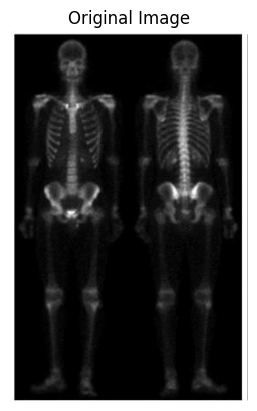

In [38]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\bone.jpg'
bone_a = plt.imread(image_path)
if bone_a is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    bone_a = bone_a.astype(np.float32)
    plt.imshow(bone_a, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

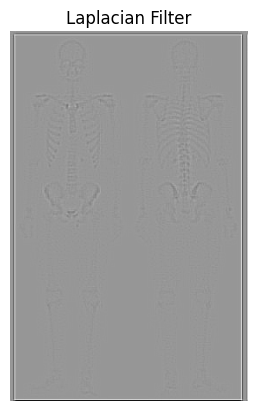

In [37]:
laplacian = cv2.Laplacian(bone_a, cv2.CV_32F, ksize=3)
bone_b = cv2.normalize(laplacian, None, 0, 1, cv2.NORM_MINMAX)

plt.imshow(bone_b, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

(np.float64(-0.5), np.float64(274.5), np.float64(427.5), np.float64(-0.5))

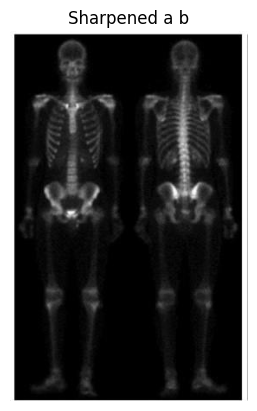

In [22]:
bone_c = cv2.subtract(bone_a, bone_b)

plt.imshow(bone_c, cmap='gray')
plt.title('Sharpened a b')
plt.axis('off')

(np.float64(-0.5), np.float64(274.5), np.float64(427.5), np.float64(-0.5))

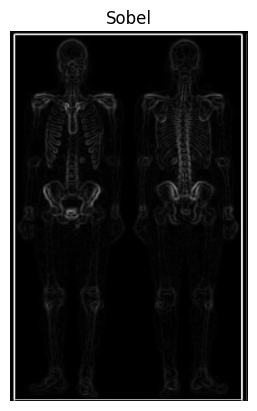

In [23]:
gx = cv2.Sobel(bone_c, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(bone_c, cv2.CV_64F, 0, 1, ksize=3)
bone_d = cv2.magnitude(gx, gy)

plt.imshow(bone_d, cmap='gray')
plt.title('Sobel')
plt.axis('off')

(np.float64(-0.5), np.float64(274.5), np.float64(427.5), np.float64(-0.5))

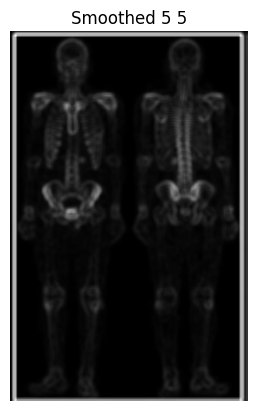

In [24]:
bone_e = cv2.blur(bone_d, (5, 5)).astype(np.float32)

plt.imshow(bone_e, cmap='gray')
plt.title('Smoothed 5 5')
plt.axis('off')

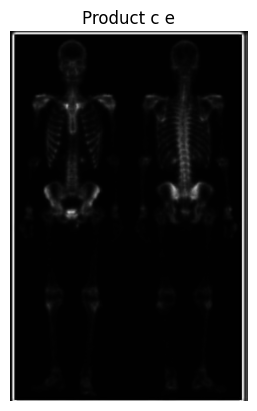

In [25]:
bone_f = cv2.multiply(bone_c, bone_e)

plt.imshow(bone_f, cmap='gray')
plt.title('Product c e')
plt.axis('off')

(np.float64(-0.5), np.float64(274.5), np.float64(427.5), np.float64(-0.5))

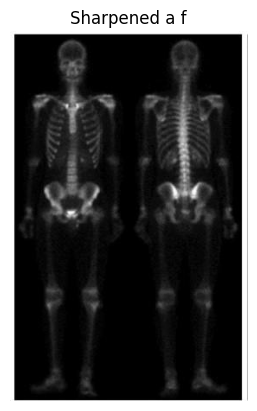

In [26]:
bone_g = cv2.addWeighted(bone_a, 1, bone_f, 0, 0)

plt.imshow(bone_g, cmap='gray')
plt.title('Sharpened a f')
plt.axis('off')

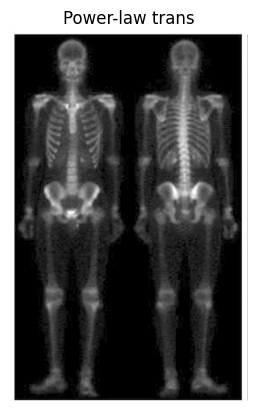

In [27]:
bone_h = (np.power(bone_g.astype(np.float64) / 255.0, 0.6) * 255).astype(np.uint64)

plt.imshow(bone_h, cmap='gray')
plt.title('Power-law trans')
plt.axis('off')

(np.float64(-0.5), np.float64(274.5), np.float64(427.5), np.float64(-0.5))

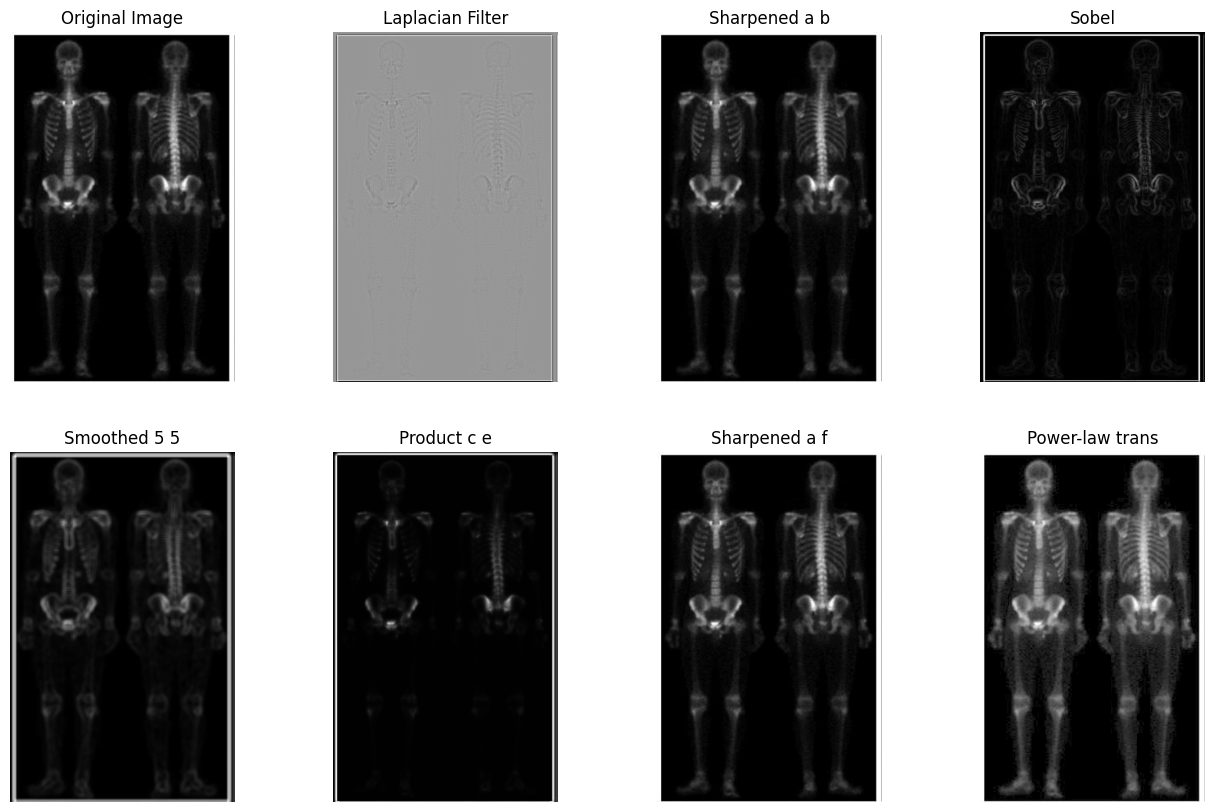

In [50]:
plt.figure(figsize=(16, 10))
                         
plt.subplot(2, 4, 1)
plt.imshow(bone_a, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(bone_b, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(bone_c, cmap='gray')
plt.title('Sharpened a b')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(bone_d, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(bone_e, cmap='gray')
plt.title('Smoothed 5 5')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(bone_f, cmap='gray')
plt.title('Product c e')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(bone_g, cmap='gray')
plt.title('Sharpened a f')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(bone_h, cmap='gray')
plt.title('Power-law trans')
plt.axis('off')

Câu 2 Find Contours Function

(np.float64(-0.5), np.float64(260.5), np.float64(180.5), np.float64(-0.5))

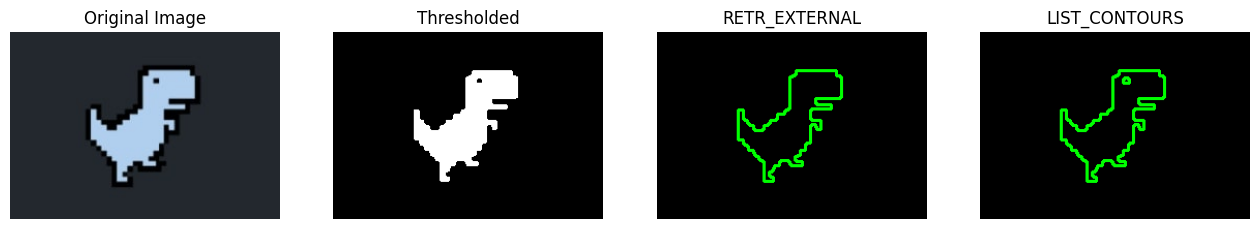

In [4]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Dino.jpg'
img = plt.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

#Thresholding
_, thresholded = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)

#RETR_EXTERNAL
contours_ext, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
external_contours = cv2.drawContours(np.zeros_like(img), contours_ext, -1, (0, 255, 0), 2)

#RETR_LIST
contours_list, _ = cv2.findContours(thresholded, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
list_contours = cv2.drawContours(np.zeros_like(img), contours_list, -1, (0, 255, 0), 2)

plt.figure(figsize=(16, 10))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(external_contours, cmap='gray')
plt.title('RETR_EXTERNAL')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(list_contours, cmap='gray')
plt.title('LIST_CONTOURS')
plt.axis('off')

Câu 3 Dice Recognition

Ảnh 1

(np.float64(-0.5), np.float64(625.5), np.float64(477.5), np.float64(-0.5))

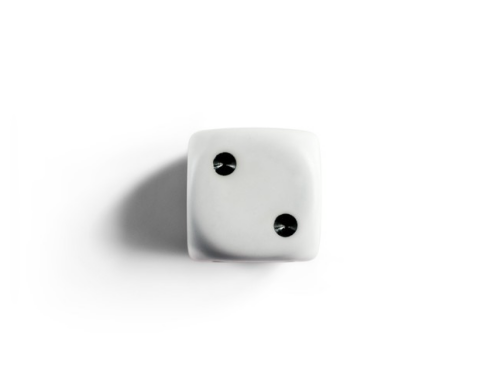

In [83]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\1.jpg'

img = plt.imread(image_path)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')

(np.float64(-0.5), np.float64(625.5), np.float64(477.5), np.float64(-0.5))

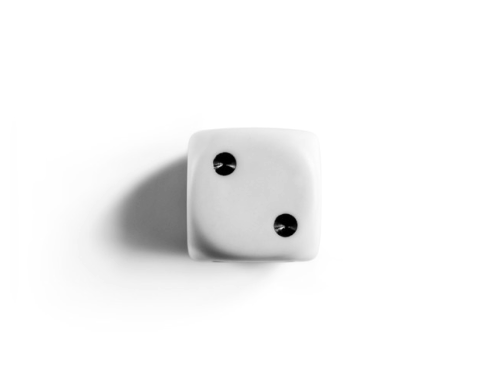

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

[[[355.85     278.85      15.67    ]
  [275.55002  198.55      15.889999]]]


(np.float64(-0.5), np.float64(625.5), np.float64(477.5), np.float64(-0.5))

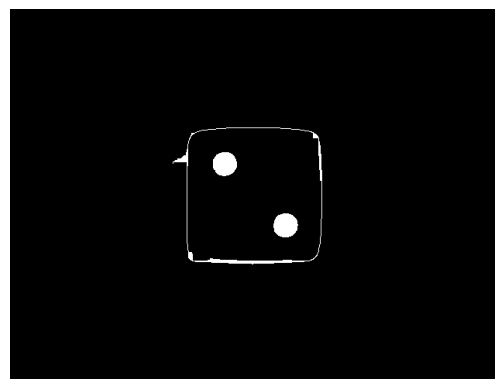

In [8]:
detected_edges = cv2.Canny(gray_img,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))

close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.1,20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(circles)

plt.imshow(close, cmap='gray')
plt.axis('off')

In [9]:
circles=circles[0,:]
print(circles)

[[355.85     278.85      15.67    ]
 [275.55002  198.55      15.889999]]


2


(np.float64(-0.5), np.float64(625.5), np.float64(477.5), np.float64(-0.5))

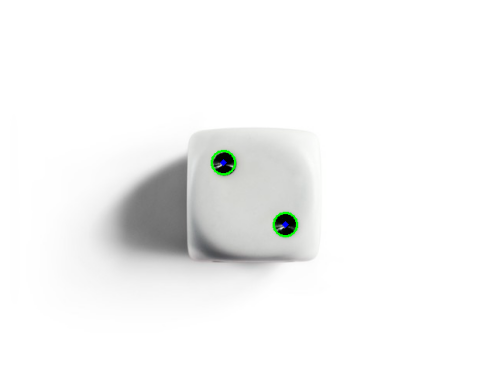

In [10]:
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

print(len(circles))
plt.imshow(rgb_img)
plt.axis('off')

In [11]:
contours, hierarchy = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print((hierarchy[0]))

1
[[-1 -1 -1 -1]]


(np.float64(-0.5), np.float64(625.5), np.float64(477.5), np.float64(-0.5))

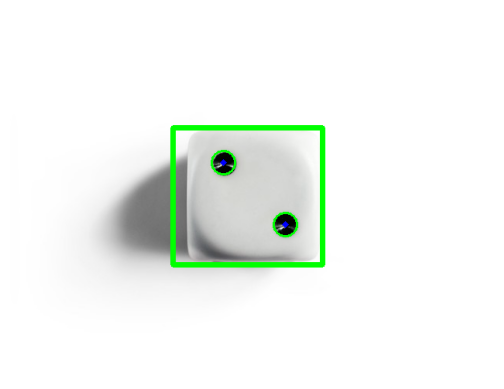

In [12]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

plt.imshow(rgb_img)
plt.axis('off')

(np.float64(-0.5), np.float64(192.5), np.float64(176.5), np.float64(-0.5))

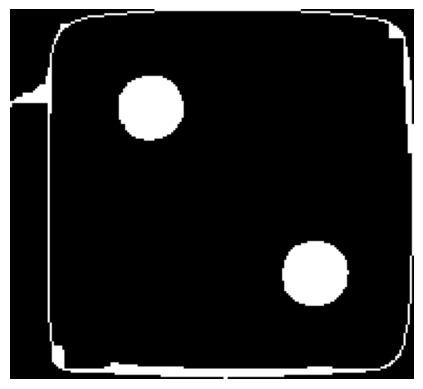

In [13]:
dice0 = close[y0:y0+h0, x0:x0+w0]

plt.imshow(dice0, cmap='gray')
plt.axis('off')

In [14]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.3,20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(len(circles0[0]))

2


(np.float64(-0.5), np.float64(625.5), np.float64(477.5), np.float64(-0.5))

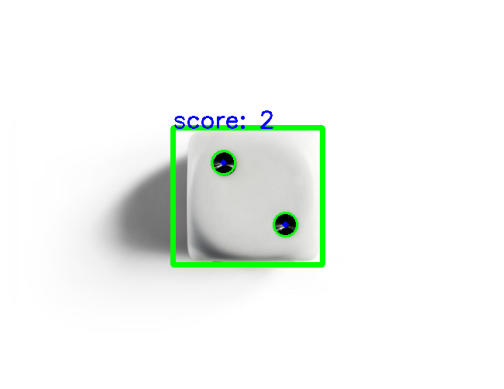

In [17]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.axis('off')

Ảnh 2

(np.float64(-0.5), np.float64(508.5), np.float64(338.5), np.float64(-0.5))

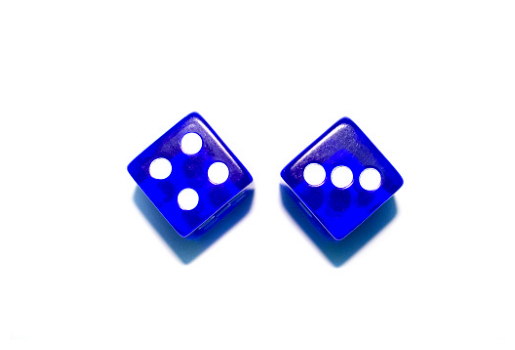

In [73]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\2.jpg'

img = plt.imread(image_path)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')

(np.float64(-0.5), np.float64(508.5), np.float64(338.5), np.float64(-0.5))

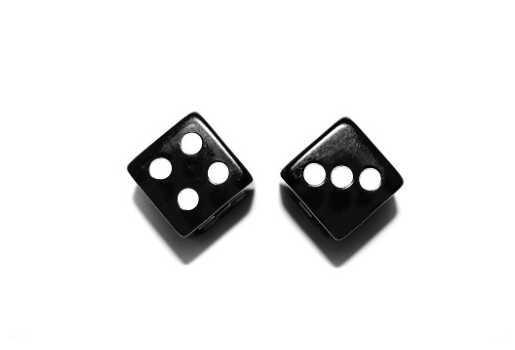

In [74]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

[[[153.       162.6       11.280001]
  [213.00002  168.6       10.440001]
  [186.6      136.20001   11.280001]
  [339.       171.        10.8     ]
  [183.       195.00002   11.160001]
  [369.       174.6        9.24    ]
  [313.80002  168.6        9.84    ]]]


(np.float64(-0.5), np.float64(508.5), np.float64(338.5), np.float64(-0.5))

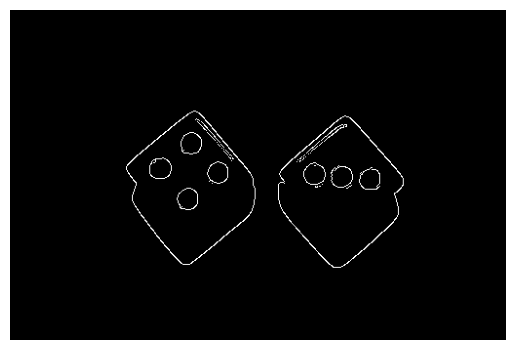

In [75]:
thresh = cv2.threshold(gray_img,220,255, cv2.THRESH_BINARY_INV)[1]

detected_edges = cv2.Canny(thresh,9, 150, 3)

circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(circles)

plt.imshow(detected_edges, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(508.5), np.float64(338.5), np.float64(-0.5))

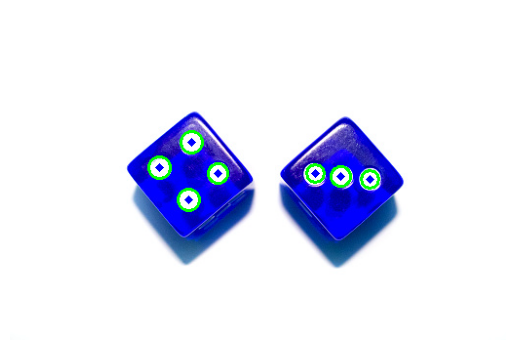

In [76]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(rgb_img)
plt.axis('off')

In [77]:
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


(np.float64(-0.5), np.float64(508.5), np.float64(338.5), np.float64(-0.5))

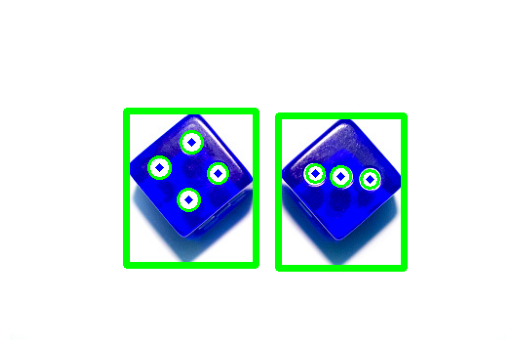

In [78]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)


plt.imshow(rgb_img)
plt.axis('off')

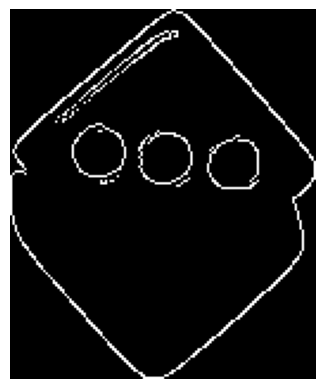

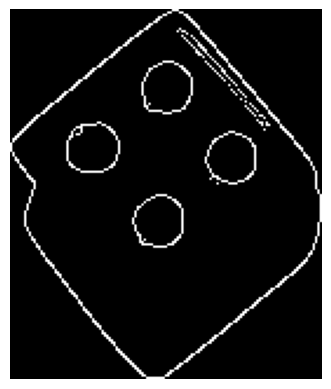

In [79]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]

plt.imshow(dice0, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.axis('off')
plt.show()

In [80]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]))

3 4


(np.float64(-0.5), np.float64(508.5), np.float64(338.5), np.float64(-0.5))

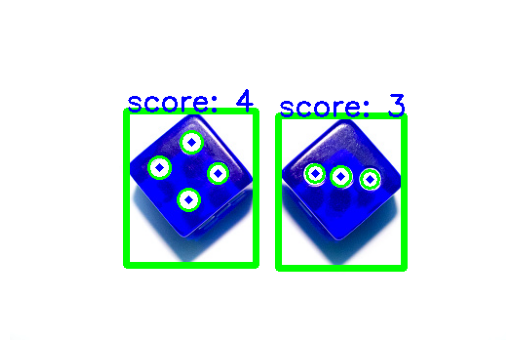

In [81]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.axis('off')

Ảnh 3

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

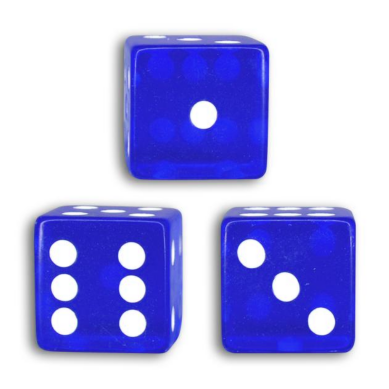

In [49]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\3.jpg'

img = plt.imread(image_path)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

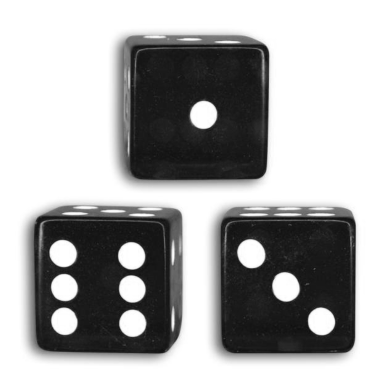

In [50]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

10


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

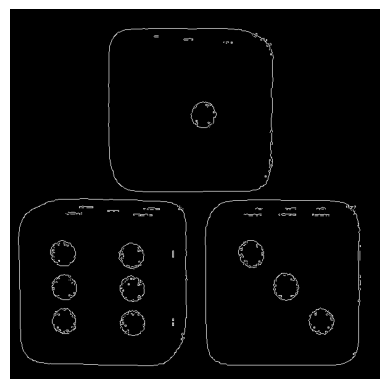

In [53]:
thresh = cv2.threshold(gray_img,250,255, cv2.THRESH_BINARY_INV)[1]

detected_edges = cv2.Canny(thresh,9, 150, 3)

circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=2,maxRadius=35)
print(len(circles[0]))

plt.imshow(detected_edges, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

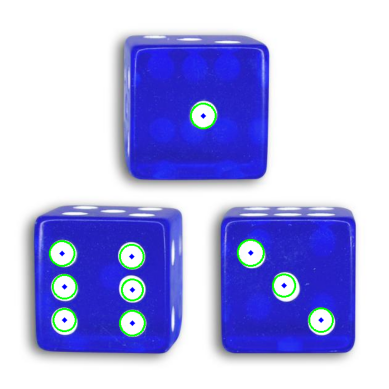

In [52]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(rgb_img)
plt.axis('off')

In [54]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [55]:
print(len(contours))
print((hierarchy[0]))

3
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

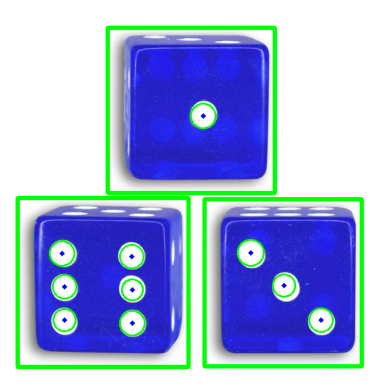

In [56]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

x2, y2, w2, h2= cv2.boundingRect(contours[2])
cv2.rectangle(rgb_img, (x2,y2),(x2+w2,y2+h2), (0,255,0),5)

plt.imshow(rgb_img)
plt.axis('off')

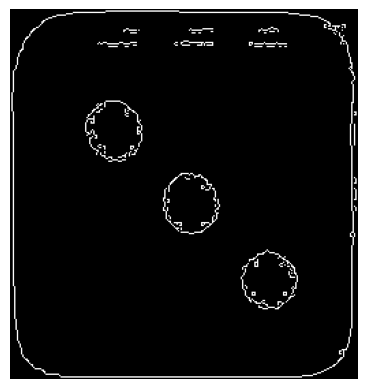

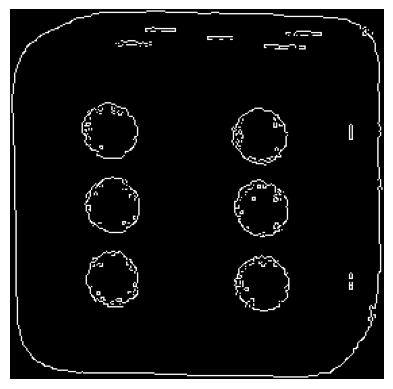

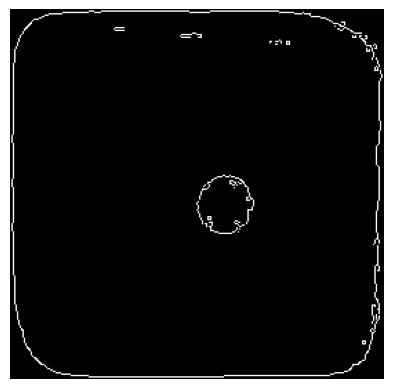

In [57]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
dice2 = detected_edges[y2:y2+h2, x2:x2+w2]

plt.imshow(dice0, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dice2, cmap='gray')
plt.axis('off')
plt.show()

In [58]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles2 = cv2.HoughCircles(dice2,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]), len(circles2[0]))

3 6 1


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

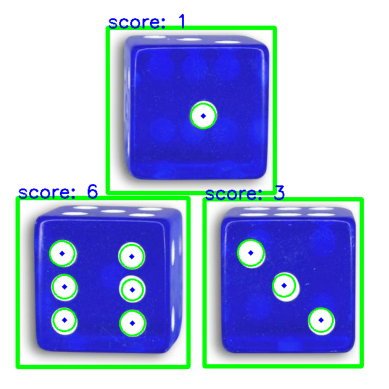

In [59]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.axis('off')

Ảnh 4

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

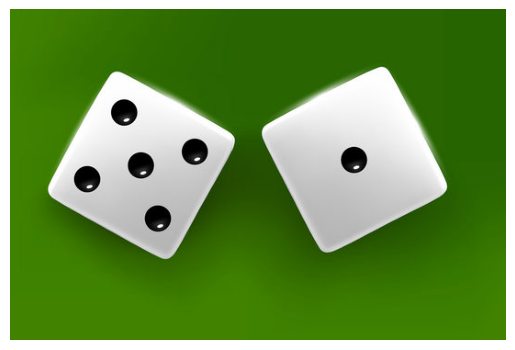

In [60]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\4.jpg'

img = plt.imread(image_path)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

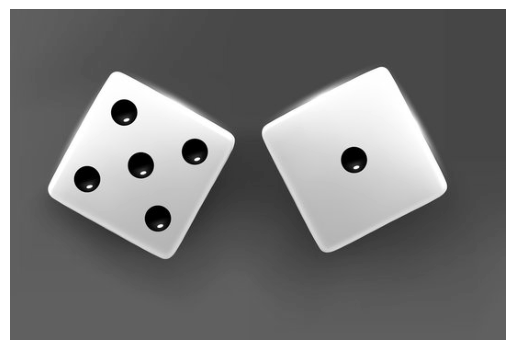

In [61]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

6


(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

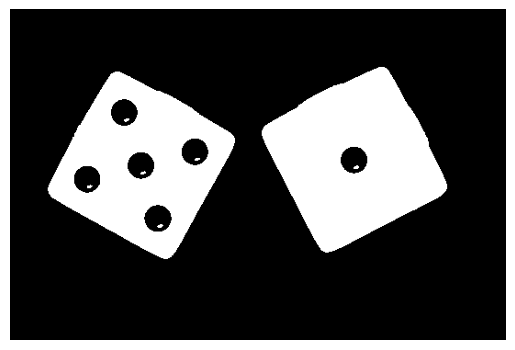

In [62]:
thresh = cv2.threshold(gray_img,150,255, cv2.THRESH_BINARY)[1]

detected_edges = cv2.Canny(thresh,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles[0]))

plt.imshow(close, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

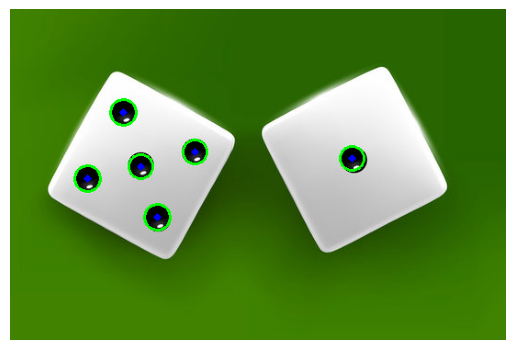

In [63]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(rgb_img)
plt.axis('off')

In [64]:
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [65]:
print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

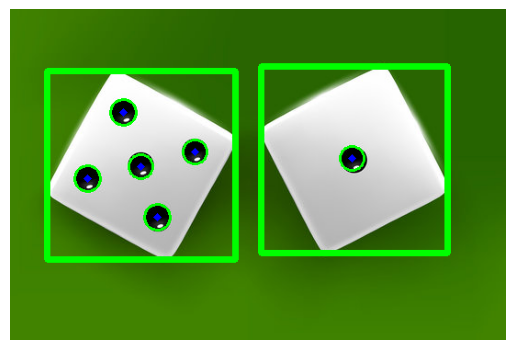

In [67]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

plt.imshow(rgb_img)
plt.axis('off')

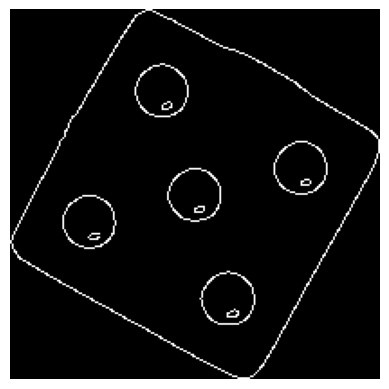

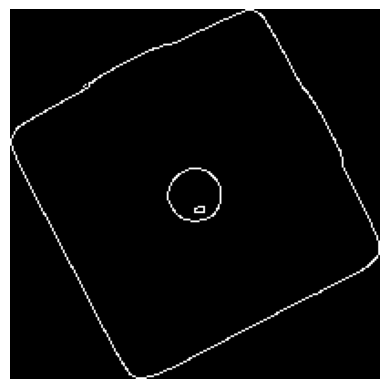

In [69]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]

plt.imshow(dice0, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.axis('off')
plt.show()

In [70]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]))

5 1


(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

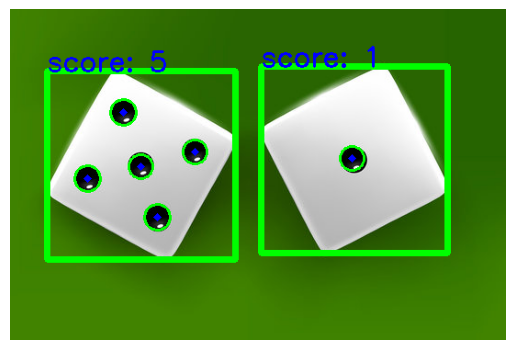

In [71]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.axis('off')